In [1]:
import tensorflow as tf
import numpy as np

n_steps = 2
n_inputs = 3
n_neurons = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.keras.layers.SimpleRNNCell(n_neurons)
layer = tf.keras.layers.RNN(basic_cell)
y = layer(X)

init = tf.global_variables_initializer()

X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]]
])

with tf.Session() as sess:
    init.run()
    output_val = y.eval(feed_dict={X: X_batch})
    
print(output_val)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

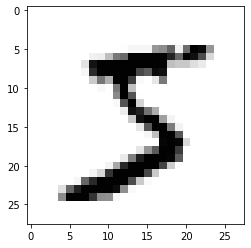

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 107us/sample - loss: 561.2832
Epoch 2/2
60000/60000 [==============================] - 6s 106us/sample - loss: 277.0191


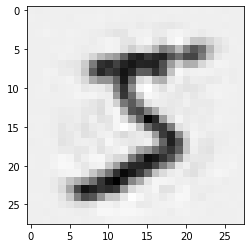

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(28 * 28)
])

nn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mean_squared_error
)

X = X_train.astype(np.float).reshape(-1, 28 * 28)

plt.imshow(X[0].reshape(28, 28), cmap="Greys")
plt.show()

nn.fit(X, X, epochs=2)
prediction = nn.predict(X[0:1])[0]

plt.imshow(prediction.reshape(28, 28), cmap="Greys")
plt.show()